In [25]:
import pandas as pd
import networkx as nx
import glob
import os
import datetime
import typing
import matplotlib.pyplot as plt

In [26]:
train_start_date = datetime.datetime(2021,12,1,0,0,0)
train_end_date = datetime.datetime(2021,12,31,23,59,59)
test_start_date = datetime.datetime(2022,1,1,0,0,0)
test_end_date = datetime.datetime(2022,3,31,23,59,59)
print(train_start_date)
print(train_end_date)
print(test_start_date)
print(test_end_date)

2021-12-01 00:00:00
2021-12-31 23:59:59
2022-01-01 00:00:00
2022-03-31 23:59:59


##  Dataset :  #wildfire 

In [27]:
df = pd.read_csv('C:\\STUFF\\RESEARCH\\TENet\\OUTPUTS\\wildfire_retweet_edges.csv')
df = df[df.Count > 0]
df = df[df['Source']!='__NOT_FOUND__']
df = df.sort_values('Count', ascending=False).reset_index(drop=True)

### Hubs of  #wildfire : TE network

In [28]:
# function to read TE network of TRAIN dataset
def analyze_te_network(te_edges_file, nodes_file):
    nodes_df = pd.read_csv(nodes_file, index_col='Id', dtype={'Id':str,'Label':str,'Count': int})
    nodes_df.rename(columns={'Count':'PostsCount'}, inplace=True)
    
    # read te network form file
    df = pd.read_csv(te_edges_file, dtype={'Source':str,'Target':str,'TE':float, 'Weight': float, 'Normalized': float})
    df = df[df.TE > 0]
    df = df[(df['Source']!='__NOT_FOUND__') & (df['Target']!='__NOT_FOUND__')]
    
    print(df)

    # generate nx graph object
    G = nx.from_pandas_edgelist(df,'Source','Target',['TE','Normalized'])
    print("running bc")
    # calculate betweenness_centrality
    r = nx.betweenness_centrality(G, k=100)
    print("finished bc")
    # add betweenness centrality to nodes dataframe as column BC
    bc = pd.Series(r, name='BC').rename_axis('Id')
    print(f'Min Betweenness Centrality : {bc.min()}')
    print(f'Max Betweenness Centrality : {bc.max()}')
    print(f'Unique Values: {bc.unique()}')
    nodes_df = nodes_df.join(bc)
    
    ax = nodes_df.BC.plot.hist()
    ax.set_title(f'#wildfire : Histogram of All Betweenness Centrality Values')
    plt.show()
    
    ax = nodes_df[nodes_df.BC >= bc.median()].BC.plot.hist(bins=100)
    ax.set_title(f'#wildfire : Histogram of Filtered Betweenness Centrality Values')
    plt.show()
    
    # calculate eigenvector_centrality
    print("running ec")
    r = nx.eigenvector_centrality(G, max_iter=100)
    print("finished ec")
    ec = pd.Series(r, name='EC').rename_axis('Id')
    print(f'Min Eigenvector Centrality : {ec.min()}')
    print(f'Max Eigenvector Centrality : {ec.max()}')
    print(f'Unique Values: {ec.unique()}')
    nodes_df = nodes_df.join(ec)
    
    ax = nodes_df.EC.plot.hist()
    ax.set_title(f'#wildfire : Histogram of All Eigenvector Centrality Values')
    plt.show()
    
    ax = nodes_df[nodes_df.EC >= ec.median()].EC.plot.hist(bins=100)
    ax.set_title(f'#wildfire : Histogram of Filtered Eigenvector Centrality Values')
    plt.show()
    
    node_outTE = df.groupby('Source').apply(lambda rows: rows['TE'].sum()).rename('OutTE').rename_axis('Id')
    
    nodes_df = nodes_df.join(node_outTE)
    
    nodes_df = nodes_df.join(df.groupby('Source').size().rename('OutDegree').rename_axis('Id'))
    
    print(f'Num nodes: {nodes_df.shape[0]}')
    print(nodes_df)
    
    return nodes_df

In [31]:
# function to read Retweet network of TRAIN dataset
def analyze_retweet_network(retweet_edges_file, nodes_file):
    nodes_df = pd.read_csv(nodes_file, index_col='Id', dtype={'Id':str,'Label':str,'Count': int})
    nodes_df.rename(columns={'Count':'PostsCount'}, inplace=True)
    
    # read retweet network form file
    df = pd.read_csv(retweet_edges_file, dtype={'Source':str,'Target':str,'Count':int, 'Weight': float})
    df = df[df.Count > 0]
    df = df[(df['Source']!='__NOT_FOUND__') & (df['Target']!='__NOT_FOUND__')]
    df = df.sort_values('Count', ascending=False).reset_index(drop=True)
    
    print(df)

    # generate nx graph object
    G = nx.from_pandas_edgelist(df,'Source','Target',['Count'])
    print("running bc")
    # calculate betweenness_centrality
    r = nx.betweenness_centrality(G, k=100)
    print("finished bc")
    # add betweenness centrality to nodes dataframe as column BC
    bc = pd.Series(r, name='BC').rename_axis('Id')
    print(f'Min Betweenness Centrality : {bc.min()}')
    print(f'Max Betweenness Centrality : {bc.max()}')
    print(f'Unique Values: {bc.unique()}')
    nodes_df = nodes_df.join(bc)
    
    ax = nodes_df.BC.plot.hist()
    ax.set_title(f'#wildfire : Histogram of All Betweenness Centrality Values')
    plt.show()
    
    ax = nodes_df[nodes_df.BC >= bc.median()].BC.plot.hist(bins=100)
    ax.set_title(f'#wildfire : Histogram of Filtered Betweenness Centrality Values')
    plt.show()
    
    # calculate eigenvector_centrality
    print("running ec")
    r = nx.eigenvector_centrality(G, max_iter=500)
    print("finished ec")
    # add betweenness centrality to nodes dataframe as column BC
    ec = pd.Series(r, name='EC').rename_axis('Id')
    print(f'Min Eigenvector Centrality : {ec.min()}')
    print(f'Max Eigenvector Centrality : {ec.max()}')
    print(f'Unique Values: {ec.unique()}')
    nodes_df = nodes_df.join(ec)
    
    ax = nodes_df.EC.plot.hist()
    ax.set_title(f'#wildfire : Histogram of All Eigenvector Centrality Values')
    plt.show()
    
    ax = nodes_df[nodes_df.EC >= ec.median()].EC.plot.hist(bins=100)
    ax.set_title(f'#wildfire : Histogram of Filtered Eigenvector Centrality Values')
    plt.show()
    
    node_outTE = df.groupby('Source').apply(lambda rows: rows['Count'].sum()).rename('ReceivedRetweets').rename_axis('Id')
    
    nodes_df = nodes_df.join(node_outTE)
    
    nodes_df = nodes_df.join(df.groupby('Source').size().rename('OutDegree').rename_axis('Id'))
    
    nodes_df = nodes_df.sort_values('ReceivedRetweets', ascending=False)
    print(f'Num nodes: {nodes_df.shape[0]}')
    print(nodes_df)
    
    return nodes_df

                  Source              Target  Count  Weight
0              125177569           125177569      7     7.0
1     884130463878529024  884130463878529024      6     6.0
2             4784417526          4784417526      5     5.0
3              479840281          4784417526      4     4.0
4     943632284439027712  979085322284748800      4     4.0
...                  ...                 ...    ...     ...
1785          1441613017          3415148113      1     1.0
1786          1441613017            33956307      1     1.0
1787          1441613017            33820115      1     1.0
1788          1441613017            33745879      1     1.0
1789  997143223033319424          3977650874      1     1.0

[1790 rows x 4 columns]
running bc
finished bc
Min Betweenness Centrality : 0.0
Max Betweenness Centrality : 0.5179210178897431
Unique Values: [9.38022867e-04 2.11758573e-02 7.22733591e-03 9.26855928e-04
 0.00000000e+00 7.81685722e-05 1.21867244e-02 5.62813720e-03
 6.09714863e-0

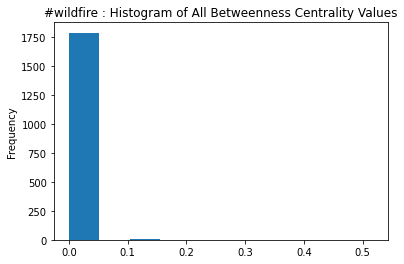

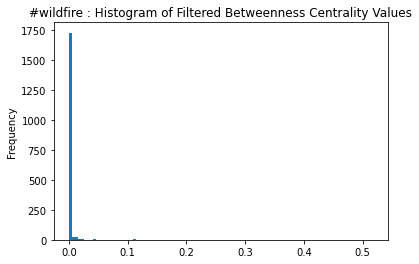

running ec
finished ec
Min Eigenvector Centrality : 3.42144402342482e-145
Max Eigenvector Centrality : 0.7063425686657476
Unique Values: [1.10749641e-003 3.21135311e-002 1.71082411e-010 4.23284187e-009
 9.97635095e-007 3.86430825e-008 6.08201839e-096 2.17607878e-096
 1.29656644e-003 5.02149481e-005 1.57913483e-096 7.45431271e-008
 2.88737890e-009 1.11084967e-003 4.30218146e-005 6.83898741e-115
 2.79200492e-115 1.89007752e-006 2.79330961e-006 1.08513576e-007
 2.69153198e-005 1.63528137e-006 8.02676173e-008 3.42144402e-145
 6.64410648e-008 6.60042305e-008 2.30508296e-003 1.91620853e-003
 7.06342569e-001 2.84218232e-002 1.07416342e-003 4.16007386e-005
 1.10493414e-003 4.27924475e-005 2.63925443e-009 1.02214344e-010
 1.08841115e-007 4.21568140e-009 2.74814421e-002 3.23801449e-002
 1.25422322e-003 1.94316194e-003 2.84938341e-130 2.79356090e-005
 1.14433938e-003 1.62799202e-002 6.32405287e-004 6.34342075e-008
 2.83542697e-002 1.88472238e-003 2.46845435e-005 9.97639437e-007
 1.08188003e-007 1

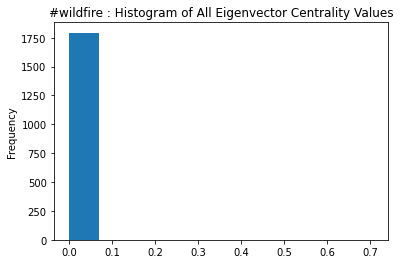

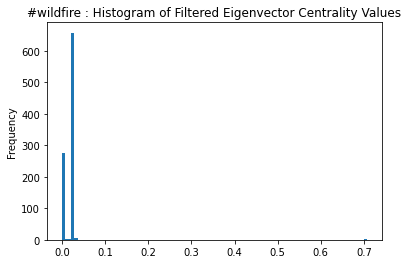

Num nodes: 2393
                               Label  PostsCount        BC             EC  \
Id                                                                          
1441613017                   bclemms           3  0.517921   7.063426e-01   
22022469             RussellHaythorn           1  0.222206   1.778888e-02   
211674501                  NickyNaus           3  0.111882   1.627992e-02   
1429476082097426433     MattDias2773           3  0.043802   2.639254e-09   
22215485                      wxbrad           7  0.034821   3.238014e-02   
...                              ...         ...       ...            ...   
997526980378624001          ktbass89           1  0.000000  3.421444e-145   
1453080254231326721   Mindset_NewsCO           1       NaN            NaN   
1099681615               azureblue68           1       NaN            NaN   
944809450388385793           Murgoot           1  0.000000  3.080081e-112   
54945432                jimodonnell2           1  0.000000  

,Label,PostsCount,BC,EC,ReceivedRetweets,OutDegree
Id,,,,,,
1441613017,bclemms,3,0.517921,7.063426e-01,667.0,665.0
22022469,RussellHaythorn,1,0.222206,1.778888e-02,215.0,215.0
211674501,NickyNaus,3,0.111882,1.627992e-02,83.0,82.0
1429476082097426433,MattDias2773,3,0.043802,2.639254e-09,51.0,47.0
22215485,wxbrad,7,0.034821,3.238014e-02,35.0,31.0
...,...,...,...,...,...,...
3910465213,ColoradoCOLABS,1,0.000000,3.421444e-145,1.0,1.0
794595153256194048,GIS_Bandit,1,0.000000,3.421444e-145,1.0,1.0
1001847421226364928,mnematie,1,0.000000,3.421444e-145,1.0,1.0


In [32]:
retweet_nodes = analyze_retweet_network('C:\\STUFF\\RESEARCH\\TENet\\OUTPUTS\\wildfire_retweet_edges.csv', 'C:\\STUFF\\RESEARCH\\TENet\\OUTPUTS\\wildfire_nodes.csv')
retweet_nodes = retweet_nodes[retweet_nodes['OutDegree'].notnull()]
retweet_nodes

                     Source               Target        TE  Weight  Normalized
0                  58658349             20207761  0.002058     1.0    0.023836
1                  58658349            128128069  0.045708     1.0    0.529447
2                  58658349            125177569  0.010678     1.0    0.123682
3                  58658349   884130463878529024  0.013310     1.0    0.154172
4                  58658349            262675787  0.025260     1.0    0.292589
...                     ...                  ...       ...     ...         ...
5721628  944809450388385793             78037475  0.000043     1.0    0.000499
5721630  944809450388385793            759950666  0.000043     1.0    0.000499
5721641  944809450388385793            271156724  0.000043     1.0    0.000499
5721642  944809450388385793            205873490  0.000043     1.0    0.000499
5721648  944809450388385793  1136367778976468992  0.000043     1.0    0.000499

[4833357 rows x 5 columns]
running bc
finished bc
M

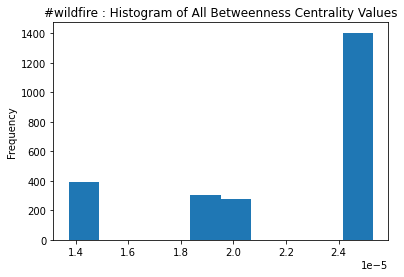

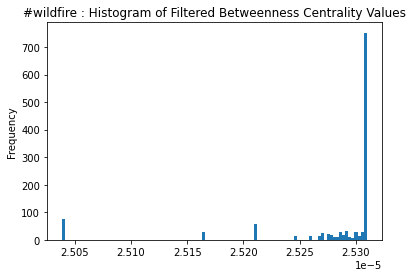

running ec
finished ec
Min Betweenness Centrality : 0.018539654077774356
Max Betweenness Centrality : 0.021775761509822446
Unique Values: [0.02177576 0.01935864 0.02176602 0.02168883 0.02175629 0.01919819
 0.02174656 0.02125264 0.02043161 0.02167874 0.02156345 0.01853965
 0.02163051 0.02171748 0.02165944 0.02159216 0.02160147 0.02164021
 0.02169811 0.02161114 0.02174656 0.02165963 0.02170776 0.02169808
 0.02167874 0.02156287 0.01927167 0.02166909 0.02172714 0.0216498
 0.02170776 0.02107771 0.02165944 0.02168844 0.0216884  0.02160174
 0.02126192 0.02162094 0.02173685 0.02173685 0.02169808 0.02165944
 0.02171745 0.02156345 0.02172714 0.0216498  0.02162094 0.02151577
 0.0217466  0.02164017 0.02172718 0.02161134 0.02164984 0.02158328]


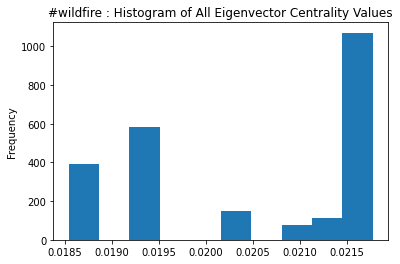

Num nodes: 2393
                               Label  PostsCount        BC        EC  \
Id                                                                     
58658349                rough_tumble          47  0.000025  0.021776   
20207761             GreyCrossStudio          40  0.000025  0.021776   
128128069              truenorthgear          24  0.000025  0.021776   
125177569                   kyloftus          20  0.000020  0.019359   
884130463878529024    BCWildfireHelp          19  0.000025  0.021776   
...                              ...         ...       ...       ...   
997526980378624001          ktbass89           1  0.000024  0.020432   
1453080254231326721   Mindset_NewsCO           1  0.000024  0.020432   
1099681615               azureblue68           1  0.000024  0.020432   
944809450388385793           Murgoot           1  0.000024  0.020432   
54945432                jimodonnell2           1       NaN       NaN   

                         OutTE  OutDegree  
Id 

,Label,PostsCount,BC,EC,OutTE,OutDegree
Id,,,,,,
58658349,rough_tumble,47,0.000025,0.021776,14.673366,2366.0
20207761,GreyCrossStudio,40,0.000025,0.021776,2.612271,2367.0
128128069,truenorthgear,24,0.000025,0.021776,12.350712,2367.0
125177569,kyloftus,20,0.000020,0.019359,7.984497,2005.0
884130463878529024,BCWildfireHelp,19,0.000025,0.021776,6.838254,2367.0
...,...,...,...,...,...,...
97578756,bryanpackebush,1,0.000024,0.020432,3.056281,1870.0
997526980378624001,ktbass89,1,0.000024,0.020432,3.056281,1870.0
1453080254231326721,Mindset_NewsCO,1,0.000024,0.020432,3.056281,1870.0


In [7]:
te_nodes = analyze_te_network('C:\\STUFF\\RESEARCH\\TENet\\OUTPUTS\\wildfire_te_edges.csv', 'C:\\STUFF\\RESEARCH\\TENet\\OUTPUTS\\wildfire_nodes.csv')
te_nodes = te_nodes[te_nodes['OutDegree'].notnull()]
te_nodes

In [8]:
# function to read TEST dataset
def read_csv_data_and_preprocess(data_dir,
                                 UNIQUE_NOT_FOUND_STRING = '__NOT_FOUND__',
                                 SORTED_HASHTAGS_LIST = ['#wildfire', '#infinitychallenge']):
    def read_csv_data(data_directory):
        """
        Reads data from all the csv files in the given directory
        :param data_directory: Path to the directory that contains the csv files
        :type data_directory: str
        :return: pandas Dataframe that contains all the data from all csv files
        :rtype: pd.Dataframe
        """
        data_files = glob.glob(os.path.join(data_directory, "*.csv*"))
        print(data_files)
        df_list = []
        for idx, file in enumerate(data_files):
            print(f"Reading {idx + 1} of {len(data_files)} files.\nFile name: {file}")
            df = pd.read_csv(data_files[0], skiprows=6, parse_dates=['Date'], dtype={'Twitter Author ID': str})
            df = df[['Date', 'Hashtags', 'Twitter Author ID', 'Author', 'Url', 'Thread Id', 'Thread Author']]
            df = df.rename(columns={'Twitter Author ID': 'AuthorID',
                                    'Thread Id': 'ThreadId', 'Thread Author': 'ThreadAuthor'})
            df_list.append(df)
        result_df = pd.concat(df_list).drop_duplicates()
        return result_df

    all_data_df = read_csv_data(data_dir)

    # resolve hashtag
    def find_hashtag(hashtag_list_str: str, sorted_target_hashtags: typing.List[str]) -> object:
        if type(hashtag_list_str) != str:
            return None
        hashtag_list = hashtag_list_str.split(", ")
        for lfh in sorted_target_hashtags:
            if lfh in hashtag_list:
                return lfh
        return None

    # verify that UNIQUE_NOT_FOUND_STRING is not in the dataset
    found = all_data_df[all_data_df['Author'] == UNIQUE_NOT_FOUND_STRING].shape[0] > 0
    print(f"Is '{UNIQUE_NOT_FOUND_STRING}' an existing username? {found} ")
    if found:
        raise Exception(f"'{UNIQUE_NOT_FOUND_STRING}' is existing in the dataset. Please choose some other string.")

    # add Hashtag column
    all_data_df['Hashtag'] = all_data_df["Hashtags"].apply(lambda x: find_hashtag(x, SORTED_HASHTAGS_LIST))
    all_data_df.drop(columns=["Hashtags"], inplace=True)

    # add ThreadAuthorID column
    author_to_author_id = all_data_df.set_index('Author')['AuthorID'].to_dict()
    all_data_df['ThreadAuthorID'] = all_data_df['ThreadAuthor'].apply(
        lambda x: author_to_author_id[x] if x in author_to_author_id else UNIQUE_NOT_FOUND_STRING)
    
    # filter for time
    all_data_df = all_data_df[(test_start_date <= all_data_df['Date']) & (all_data_df['Date'] <= test_end_date)]

    return all_data_df

In [9]:
test_df = read_csv_data_and_preprocess('C:\\STUFF\\RESEARCH\\TENet\\DATA')

['C:\\STUFF\\RESEARCH\\TENet\\DATA\\2033703822_TheThreeTopics.csv.zip']
Reading 1 of 1 files.
File name: C:\STUFF\RESEARCH\TENet\DATA\2033703822_TheThreeTopics.csv.zip
Is '__NOT_FOUND__' an existing username? False 


In [10]:
test_df

,Date,AuthorID,Author,Url,ThreadId,ThreadAuthor,Hashtag,ThreadAuthorID
0,2022-03-01 23:46:23,2498932848,berkeleyforests,http://twitter.com/berkeleyforests/statuses/14...,1498310370661834754,pgonzaleztweet,#wildfire,767859059793989632
1,2022-03-01 23:15:13,3214604043,LarimerOEM,http://twitter.com/LarimerOEM/statuses/1498799...,1498705080257847303,LarimerCounty,#wildfire,17511789
2,2022-03-01 23:08:47,33319260,joanacasey,http://twitter.com/joanacasey/statuses/1498797...,1498790105317879809,BuClimateHealth,#wildfire,1255223783150977027
3,2022-03-01 22:53:28,3437976809,RobMooreNRDC,http://twitter.com/RobMooreNRDC/statuses/14987...,1498296932753678343,SmarterSafer,#wildfire,__NOT_FOUND__
4,2022-03-01 22:49:30,227400774,ForestryUSA,http://twitter.com/ForestryUSA/statuses/149879...,0,NaN,#wildfire,__NOT_FOUND__
...,...,...,...,...,...,...,...,...
4149,2022-01-01 00:23:27,848349029222277120,48_millerw,http://twitter.com/48_millerw/statuses/1477072...,1476921494617747457,bclemms,#wildfire,1441613017
4150,2022-01-01 00:21:01,2601292886,Dan_Pope_FOX13,http://twitter.com/Dan_Pope_FOX13/statuses/147...,1476921494617747457,bclemms,#wildfire,1441613017
4151,2022-01-01 00:05:20,348249248,mikiekasten,http://twitter.com/mikiekasten/statuses/147706...,1476921494617747457,bclemms,#wildfire,1441613017
4152,2022-01-01 00:00:09,2869531945,aphotomama,http://twitter.com/aphotomama/statuses/1477067...,1476940364028256257,SmithersAlec,#wildfire,__NOT_FOUND__


In [11]:
te_bc_hubs_set = te_nodes.nlargest(100, 'BC').index.to_list()
te_bc_hubs_set = set(te_bc_hubs_set)
te_bc_hubs_set

{'100663115',
 '102177669',
 '1095764112947191808',
 '1097909458364174337',
 '1101081968',
 '1136055528273133569',
 '1141882267469524992',
 '1148457028920078336',
 '1163887880',
 '1227524534',
 '1247025364137693185',
 '1252623486905839618',
 '128128069',
 '12837932',
 '1298648659362373632',
 '1318962022143254530',
 '1327793130',
 '1337126552283308035',
 '1354157563114364929',
 '1354890464',
 '1403131600653590528',
 '1417127950059773954',
 '1455248460',
 '14603016',
 '1471594463722041344',
 '14957366',
 '151543424',
 '151703313',
 '154902138',
 '16309969',
 '1665278250',
 '170554164',
 '174773888',
 '179261808',
 '18454808',
 '186266824',
 '1877444256',
 '1908515251',
 '19215993',
 '20207761',
 '20295438',
 '20453796',
 '20758263',
 '211234069',
 '22215485',
 '22295987',
 '22653760',
 '23024287',
 '239666710',
 '2414195305',
 '2493306794',
 '250402748',
 '25144145',
 '2530758806',
 '257199727',
 '2598357146',
 '262675787',
 '2638011844',
 '268260668',
 '27247948',
 '306243059',
 '314024

In [21]:
te_ec_hubs_set = te_nodes.nlargest(100, 'EC').index.to_list()
te_ec_hubs_set = set(te_ec_hubs_set)
te_ec_hubs_set

{'100663115',
 '102177669',
 '1095764112947191808',
 '1097909458364174337',
 '1101081968',
 '1136055528273133569',
 '1141882267469524992',
 '1148457028920078336',
 '1163887880',
 '1227524534',
 '1247025364137693185',
 '1252623486905839618',
 '128128069',
 '12837932',
 '1298648659362373632',
 '1309752972',
 '1318962022143254530',
 '1327793130',
 '1337126552283308035',
 '1354157563114364929',
 '1354890464',
 '1403131600653590528',
 '141009810',
 '1417127950059773954',
 '1455248460',
 '14603016',
 '1471594463722041344',
 '14957366',
 '151543424',
 '151703313',
 '154902138',
 '15888358',
 '16309969',
 '1665278250',
 '170554164',
 '174773888',
 '179261808',
 '1877444256',
 '1908515251',
 '19215993',
 '20207761',
 '20295438',
 '20453796',
 '20758263',
 '211234069',
 '211674501',
 '22653760',
 '23024287',
 '239666710',
 '2414195305',
 '2493306794',
 '250402748',
 '25144145',
 '2520327521',
 '2530758806',
 '257199727',
 '257578713',
 '2598357146',
 '262675787',
 '2638011844',
 '268260668',
 '2

In [12]:
te_out_te_hubs_set = te_nodes.nlargest(100, 'OutTE').index.to_list()
te_out_te_hubs_set = set(te_out_te_hubs_set)
te_out_te_hubs_set

{'1018998014780768256',
 '1025644920',
 '1068957070483968001',
 '1082825593325006849',
 '113216492',
 '116876025',
 '117197862',
 '117511595',
 '118190794',
 '1197541114556768256',
 '124831353',
 '124846742',
 '1257627444',
 '1287526376',
 '1341330097865932800',
 '1402746085',
 '1412938217079414789',
 '1416567270797717504',
 '1418673490559848448',
 '14249445',
 '14786426',
 '15129601',
 '15174125',
 '15871870',
 '15990298',
 '17108998',
 '17416436',
 '17928244',
 '18276967',
 '1858891326',
 '1873092294',
 '187784226',
 '18959367',
 '20231803',
 '20557363',
 '20725054',
 '20820158',
 '2247855421',
 '22568654',
 '2257946473',
 '232425279',
 '237572596',
 '23807394',
 '23899992',
 '2414786894',
 '246036410',
 '24637217',
 '253703076',
 '2610598236',
 '262675787',
 '26382985',
 '272989565',
 '273579364',
 '275668188',
 '278215497',
 '278341200',
 '2840599340',
 '2848874730',
 '292006712',
 '295972885',
 '297602297',
 '299729605',
 '2999297760',
 '3001253601',
 '3098344542',
 '31323798',
 '

In [13]:
te_outdegree_hubs_set = te_nodes.nlargest(100, 'OutDegree').index.to_list()
te_outdegree_hubs_set = set(te_outdegree_hubs_set)
te_outdegree_hubs_set

{'100663115',
 '102177669',
 '1090393941592006656',
 '1095764112947191808',
 '1097909458364174337',
 '1101081968',
 '1136055528273133569',
 '1141882267469524992',
 '1148457028920078336',
 '1163887880',
 '1227524534',
 '1238031663038435334',
 '1247025364137693185',
 '1270000772709662721',
 '128128069',
 '12837932',
 '1298648659362373632',
 '1309752972',
 '1318962022143254530',
 '1327793130',
 '1337126552283308035',
 '1354890464',
 '1403131600653590528',
 '141009810',
 '1417127950059773954',
 '1455248460',
 '14603016',
 '1471594463722041344',
 '14957366',
 '151543424',
 '154902138',
 '15888358',
 '16309969',
 '1665278250',
 '170554164',
 '174773888',
 '179261808',
 '18454808',
 '18487522',
 '1877444256',
 '1908515251',
 '19215993',
 '20207761',
 '20295438',
 '20453796',
 '20758263',
 '211234069',
 '22215485',
 '22295987',
 '22653760',
 '23024287',
 '2366043722',
 '239666710',
 '2414195305',
 '2493306794',
 '250402748',
 '25144145',
 '2520327521',
 '2530758806',
 '257199727',
 '257578713'

In [33]:
retweet_bc_hubs_set = retweet_nodes.nlargest(100, 'BC').index.to_list()
retweet_bc_hubs_set = set(retweet_bc_hubs_set)
retweet_bc_hubs_set

{'1012745263671226369',
 '102177669',
 '1093018644274016257',
 '1097909458364174337',
 '1136055528273133569',
 '1138299144',
 '125177569',
 '12807482',
 '130033510',
 '1303423016613806080',
 '1305876752686694400',
 '1348971070347501568',
 '1354890464',
 '1417127950059773954',
 '14248988',
 '1429476082097426433',
 '1438186067589361664',
 '1441613017',
 '1445112541382856713',
 '1461521615544635402',
 '149197471',
 '14957366',
 '151543424',
 '15665499',
 '16313592',
 '16367986',
 '1665278250',
 '1733154127',
 '179261808',
 '18487522',
 '18799695',
 '1908515251',
 '19215993',
 '20453796',
 '20998647',
 '211674501',
 '2187906247',
 '219070649',
 '22022469',
 '22215485',
 '22568654',
 '2266035060',
 '22798324',
 '22828837',
 '2352684182',
 '2436140221',
 '2439154200',
 '25144145',
 '253166428',
 '253291463',
 '2537319650',
 '2546473200',
 '255621458',
 '2598357146',
 '262675787',
 '2694243104',
 '275104144',
 '278566733',
 '314024592',
 '3245582817',
 '327674143',
 '347900663',
 '3595827013'

In [34]:
retweet_ec_hubs_set = retweet_nodes.nlargest(100, 'EC').index.to_list()
retweet_ec_hubs_set = set(retweet_ec_hubs_set)
retweet_ec_hubs_set

{'1012745263671226369',
 '102177669',
 '1093018644274016257',
 '1097909458364174337',
 '1136055528273133569',
 '1141882267469524992',
 '1243370284784082944',
 '125177569',
 '12807482',
 '130033510',
 '1303423016613806080',
 '1305876752686694400',
 '1348971070347501568',
 '1354890464',
 '1417127950059773954',
 '1438186067589361664',
 '1441613017',
 '1445112541382856713',
 '1461521615544635402',
 '1471594463722041344',
 '147672166',
 '149197471',
 '14957366',
 '151543424',
 '15990298',
 '16313592',
 '16367986',
 '1665278250',
 '1733154127',
 '179261808',
 '18487522',
 '18799695',
 '188436103',
 '19215993',
 '20453796',
 '20998647',
 '211674501',
 '2187906247',
 '219070649',
 '22022469',
 '22215485',
 '22568654',
 '2266035060',
 '22798324',
 '22828837',
 '2352684182',
 '2436140221',
 '2439154200',
 '25144145',
 '253291463',
 '2598357146',
 '26287962',
 '2694243104',
 '269851258',
 '278566733',
 '314024592',
 '3245582817',
 '327674143',
 '33345091',
 '343631219',
 '347900663',
 '3595827013

In [35]:
retweet_received_retweets_hubs_set = retweet_nodes.nlargest(100, 'ReceivedRetweets').index.to_list()
retweet_received_retweets_hubs_set = set(retweet_received_retweets_hubs_set)
retweet_received_retweets_hubs_set

{'1012745263671226369',
 '102177669',
 '1062861241926922240',
 '1090393941592006656',
 '1093018644274016257',
 '1097909458364174337',
 '115366623',
 '125177569',
 '12807482',
 '130033510',
 '1305876752686694400',
 '1354890464',
 '1417127950059773954',
 '14248988',
 '1429476082097426433',
 '1431013098',
 '1435492410',
 '1438186067589361664',
 '1441613017',
 '149197471',
 '14957366',
 '1580787098',
 '16313592',
 '16367986',
 '1665278250',
 '17070745',
 '172427615',
 '1733154127',
 '17605462',
 '177696530',
 '179226033',
 '18487522',
 '18799695',
 '1908515251',
 '19215993',
 '19435213',
 '20998647',
 '211674501',
 '2179224523',
 '2187906247',
 '22022469',
 '22215485',
 '22503671',
 '22653760',
 '2266035060',
 '22798324',
 '2282270222',
 '2352684182',
 '2419955412',
 '2439154200',
 '2493306794',
 '25144145',
 '253166428',
 '253291463',
 '2537319650',
 '2546473200',
 '255621458',
 '2598357146',
 '262675787',
 '2694243104',
 '275104144',
 '29540950',
 '3180640562',
 '322887934',
 '3232685437

In [36]:
retweet_outdegree_hubs_set = retweet_nodes.nlargest(100, 'OutDegree').index.to_list()
retweet_outdegree_hubs_set = set(retweet_outdegree_hubs_set)
retweet_outdegree_hubs_set

{'1012745263671226369',
 '102177669',
 '1062861241926922240',
 '1090393941592006656',
 '1093018644274016257',
 '1097909458364174337',
 '115366623',
 '125177569',
 '12807482',
 '130033510',
 '1305876752686694400',
 '1354890464',
 '1417127950059773954',
 '14248988',
 '1429476082097426433',
 '1431013098',
 '1435492410',
 '1438186067589361664',
 '1441613017',
 '149197471',
 '14957366',
 '1580787098',
 '16313592',
 '16367986',
 '1665278250',
 '17070745',
 '172427615',
 '1733154127',
 '17605462',
 '177696530',
 '179226033',
 '18487522',
 '18799695',
 '1908515251',
 '19215993',
 '19435213',
 '20998647',
 '211674501',
 '2179224523',
 '2187906247',
 '22022469',
 '22215485',
 '22503671',
 '22653760',
 '2266035060',
 '22798324',
 '2282270222',
 '2352684182',
 '2419955412',
 '2439154200',
 '2493306794',
 '25144145',
 '253166428',
 '253291463',
 '2537319650',
 '2546473200',
 '255621458',
 '2598357146',
 '262675787',
 '2694243104',
 '275104144',
 '29540950',
 '3180640562',
 '322887934',
 '3232685437

In [37]:
# find how many of the hubs from TRAIN data got retweets in the TEST data
test_df_source_user_set = set(test_df.ThreadAuthorID.unique())

print(f"TE between. cent. hubs with retweets : {len(test_df_source_user_set.intersection(te_bc_hubs_set))}")
print(f"TE out te hubs with retweets : {len(test_df_source_user_set.intersection(te_out_te_hubs_set))}")
print(f"TE outdegree hubs with retweets : {len(test_df_source_user_set.intersection(te_outdegree_hubs_set))}")

print(f"Retweet between. cent. hubs with retweets : {len(test_df_source_user_set.intersection(retweet_bc_hubs_set))}")
print(f"Retweet received retweets hubs with retweets : {len(test_df_source_user_set.intersection(retweet_received_retweets_hubs_set))}")
print(f"Retweet outdegree hubs with retweets : {len(test_df_source_user_set.intersection(retweet_outdegree_hubs_set))}")

TE between. cent. hubs with retweets : 34
TE out te hubs with retweets : 1
TE outdegree hubs with retweets : 36
Retweet between. cent. hubs with retweets : 36
Retweet received retweets hubs with retweets : 36
Retweet outdegree hubs with retweets : 36


In [38]:
# Ranking of Users based on "Who got most retweets?"
received_retweets = test_df[test_df.ThreadAuthorID != '__NOT_FOUND__'].ThreadAuthorID.value_counts()
received_retweets = received_retweets.sort_values(ascending=False).rename('Count').rename_axis('AuthorID').reset_index()
# print the first 100 ranks
received_retweets[:100]

,AuthorID,Count
0,763336831295328256,73
1,187043060,52
2,25144145,47
3,1441613017,43
4,29097819,41
...,...,...
95,385037555,4
96,1304104819964035073,4
97,225105437,4
98,1417127950059773954,4


In [39]:
hd = {"BetwCnt":te_bc_hubs_set, "EigenCent":te_ec_hubs_set, "outTE":te_out_te_hubs_set, "outdegree":te_outdegree_hubs_set}
for hubset in hd:
    # the rank of TE Hubs in the ReceivedRetweets ranking
    te_hubs_rank = received_retweets[received_retweets.AuthorID.isin(hd[hubset])]
    # print the TE Hubs who made it to the first 100 ranks
    print("\n", hubset)
    print(len(te_hubs_rank[te_hubs_rank.index < 100]))
    print(te_hubs_rank[te_hubs_rank.index < 100])


 BetwCnt
20
               AuthorID  Count
0    763336831295328256     73
2              25144145     47
6             587575999     28
7             239666710     28
11             14957366     23
14   852163986644717568     21
15             19215993     20
20           1908515251     17
31   884130463878529024     12
32             22653760     11
42            484265155      9
53            314024592      7
57             18454808      7
61           1327793130      7
68            250402748      6
70           2493306794      6
74           1354890464      6
80  1403131600653590528      6
89  1318962022143254530      5
98  1417127950059773954      4

 EigenCent
19
               AuthorID  Count
0    763336831295328256     73
2              25144145     47
6             587575999     28
7             239666710     28
11             14957366     23
14   852163986644717568     21
15             19215993     20
20           1908515251     17
31   884130463878529024     12
32         

In [40]:
hd = {"BetwCnt":retweet_bc_hubs_set, "EigenCnt":retweet_ec_hubs_set, "RR":retweet_received_retweets_hubs_set, "outdegree":retweet_outdegree_hubs_set}
for hubset in hd:
    # the rank of Retweet Hubs in the ReceivedRetweets ranking
    retweet_hubs_rank = received_retweets[received_retweets.AuthorID.isin(hd[hubset])]
    # print the Retweet Hubs who made it to the first 100 ranks
    print("\n", hubset)
    print(len(retweet_hubs_rank[retweet_hubs_rank.index < 100]))
    print(retweet_hubs_rank[retweet_hubs_rank.index < 100])


 BetwCnt
19
               AuthorID  Count
0    763336831295328256     73
2              25144145     47
3            1441613017     43
11             14957366     23
13             50361094     21
14   852163986644717568     21
15             19215993     20
16           2187906247     18
19             18487522     17
20           1908515251     17
31   884130463878529024     12
38           2546473200     10
39             36736490     10
42            484265155      9
53            314024592      7
66            130033510      6
73            533301912      6
74           1354890464      6
98  1417127950059773954      4

 EigenCnt
15
               AuthorID  Count
2              25144145     47
3            1441613017     43
11             14957366     23
14   852163986644717568     21
15             19215993     20
16           2187906247     18
19             18487522     17
31   884130463878529024     12
39             36736490     10
42            484265155      9
53          